In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
fashion_train=pd.read_csv("fashion-mnist-train.csv")
fashion_test=pd.read_csv("fashion-mnist-test.csv")

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
X_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion=fashion_train['label']
X_test_fashion=fashion_train.drop('label',axis=1)
y_test_fashion=fashion_train['label']

In [5]:
X_train_fashion.shape

(60000, 784)

In [6]:
X_train_fashion = X_train_fashion.values / 255.0
X_test_fashion = X_test_fashion.values / 255.0

X_train_fashion = X_train_fashion.reshape(-1, 784)
X_test_fashion = X_test_fashion.reshape(-1, 784)


In [7]:
X_train_fashion

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_test_fashion

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

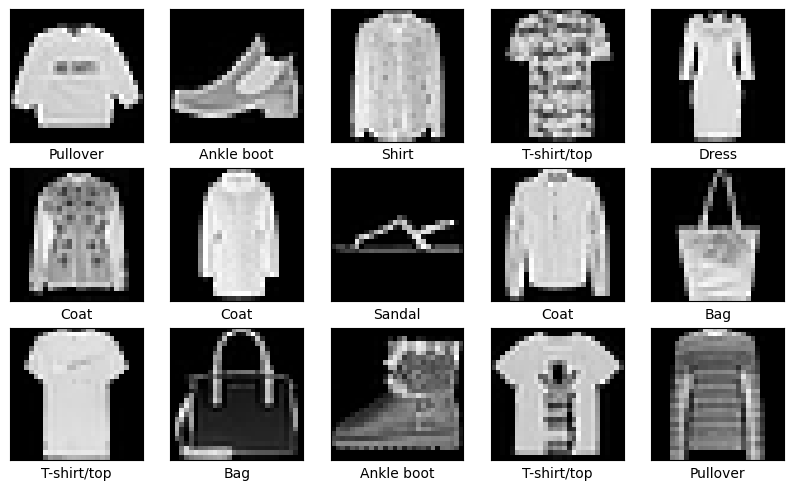

In [9]:
col_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_fashion[i].reshape(28, 28),cmap='grey')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [10]:
y_train_fashion=to_categorical(y_train_fashion,num_classes=10)
y_test_fashion=to_categorical(y_test_fashion,num_classes=10)

In [11]:
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),

    layers.Dense(10,activation='sigmoid'),
])

C:\Users\anora\Documents\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,754 (874.04 KB)

 Trainable params: 222,986 (871.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history=model.fit(X_train_fashion,y_train_fashion,batch_size=100,epochs=10,validation_data=(X_test_fashion,y_test_fashion))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8396 - loss: 0.4504 - val_accuracy: 0.8684 - val_loss: 0.3509
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8450 - loss: 0.4339 - val_accuracy: 0.8772 - val_loss: 0.3419
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8451 - loss: 0.4343 - val_accuracy: 0.8813 - val_loss: 0.3279
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8516 - loss: 0.4132 - val_accuracy: 0.8813 - val_loss: 0.3280
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8546 - loss: 0.4107 - val_accuracy: 0.8830 - val_loss: 0.3259
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8502 - loss: 0.4248 - val_accuracy: 0.8797 - val_loss: 0.3326
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8543 - loss: 0.4113 - val_accuracy: 0.8846 - val_loss: 0.3132
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8562 - loss: 0.4079 - val_a

In [16]:
test_loss_fashion,test_acc_fashion=model.evaluate(X_test_fashion,y_test_fashion)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8878 - loss: 0.3108


In [17]:
print("TEST ACCURACY:",round(test_acc_fashion,4))

TEST ACCURACY: 0.8867


In [19]:
y_predict=model.predict(X_test_fashion)
y_predicts=np.argmax(y_predict,axis=1)
y_test_fashion_eval=np.argmax(y_test_fashion,axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


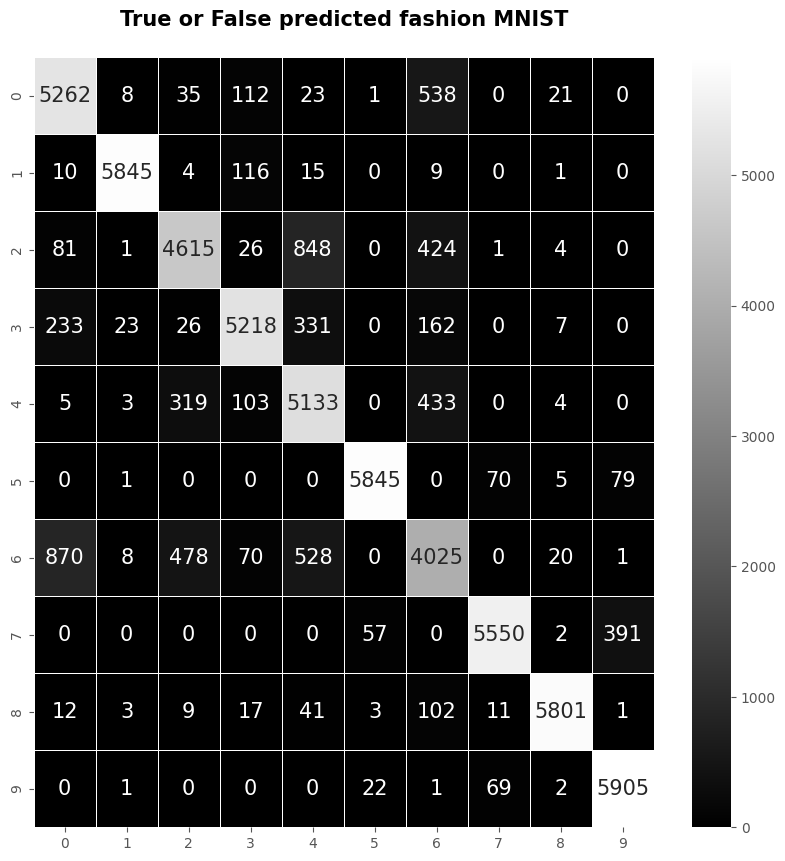

In [21]:

con_mat = confusion_matrix(y_test_fashion_eval, y_predicts)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted fashion MNIST\n', fontweight='bold', fontsize=15)
plt.show()



In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fashion_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6000
           1       0.99      0.97      0.98      6000
           2       0.84      0.77      0.80      6000
           3       0.92      0.87      0.89      6000
           4       0.74      0.86      0.79      6000
           5       0.99      0.97      0.98      6000
           6       0.71      0.67      0.69      6000
           7       0.97      0.93      0.95      6000
           8       0.99      0.97      0.98      6000
           9       0.93      0.98      0.95      6000

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



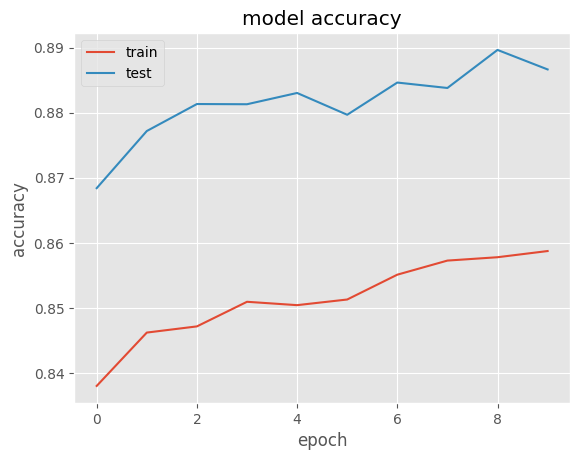

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

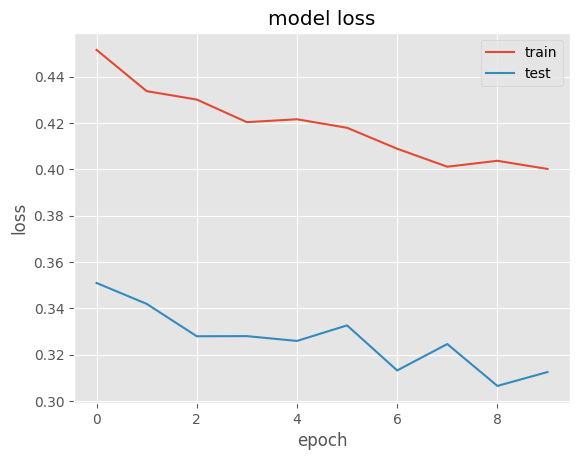

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [27]:
y_predict_single=model.predict(X_test_fashion[2].reshape(1,-1))
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(y_test_fashion,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


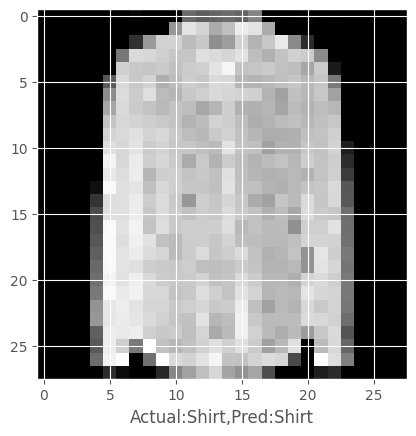

In [30]:
col_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(X_test_fashion[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[2])], col_names[y_predicts_single[0]]))
plt.show()
